In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from scipy.optimize import curve_fit

experimental_data = r"../experimental data\experimental csvs\5.0uV_normalized.csv"
experimental_df = pd.read_csv(experimental_data)

experimental_df


,B,I_c
0,-9.560000,0.102346
1,-9.545815,0.104308
2,-9.541624,0.106734
3,-9.540609,0.111585
4,-9.540609,0.111585
...,...,...
3892,10.431567,0.089754
3893,10.438123,0.080050
3894,10.440000,0.085089
3895,10.440000,0.080708


In [3]:
x_values = experimental_df['B'].values
y_values = experimental_df['I_c'].values
model_data_df = pd.read_csv(r"..\experimental data\artifical data\model_experimental_data.csv")

In [4]:
def fourier_series(x, *a):
    """Function to calculate Fourier series."""
    n = len(a) // 2
    result = a[0]  # DC component
    for i in range(1, n + 1):
        result += a[i] * np.cos(2 * np.pi * i * x) + a[i + 1] * np.sin(2 * np.pi * i * x)
    return result

def fit_fourier_series(x_values, y_values, n_terms):
    """Fit Fourier series of specified number of terms to input data."""
    popt, _ = curve_fit(fourier_series, x_values, y_values, p0=[0] * (2 * n_terms))
    return popt


In [5]:
model_data_df = pd.DataFrame({'B': np.linspace(-10, 10, 10000)})
x_values = experimental_df['B']

# Example data for y_values
# Replace this with your actual experimental data
y_values = experimental_df['I_c']

# Fit Fourier series
n_terms = 1000  # Number of Fourier terms
coefficients = fit_fourier_series(x_values, y_values, n_terms)

def fourier_function(x):
    return fourier_series(x, *coefficients)

In [ ]:
new_experimental_data = pd.DataFrame({'B': x_values, 'I_c': fourier_function(x_values)})

In [16]:

coefficients = np.polyfit(x_values, y_values, 50)
function = np.poly1d(coefficients)
arr = []

for values in model_data_df['B']:
    arr.append([values, function(values)])

new_experimental_data = pd.DataFrame(arr, columns=['B', 'I_c'])

new_experimental_data

C:\Users\nanowire\AppData\Local\Temp\ipykernel_18712\2583545451.py:1: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_values, y_values, 50)


,B,I_c
0,-10.000000,-152.746765
1,-9.998000,-148.862171
2,-9.996000,-145.068206
3,-9.993999,-141.362928
4,-9.991999,-137.744430
...,...,...
9995,9.991999,0.107693
9996,9.993999,0.107770
9997,9.996000,0.107849
9998,9.998000,0.107931


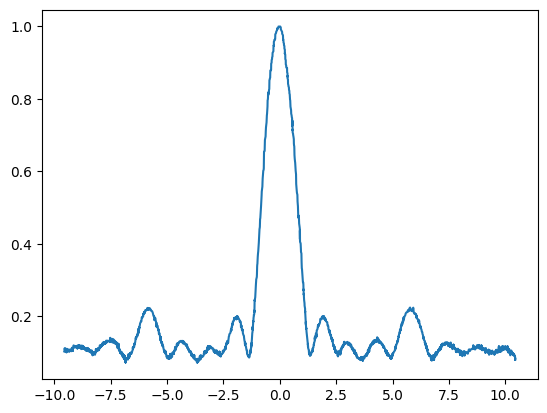

In [38]:
file_path = r"../experimental data\experimental csvs\5.0uV_normalized.csv"

import numpy as np
import pandas as pd

# Read the CSV data into a Pandas DataFrame
df = pd.read_csv(file_path)

# Extract the time and data columns
time = df['B']
data = df['I_c']

# Convert the time and data columns to NumPy arrays
time = np.array(time)
data = np.array(data)

plt.plot(time, data)
plt.show()

c:\Users\cliff\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\cliff\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


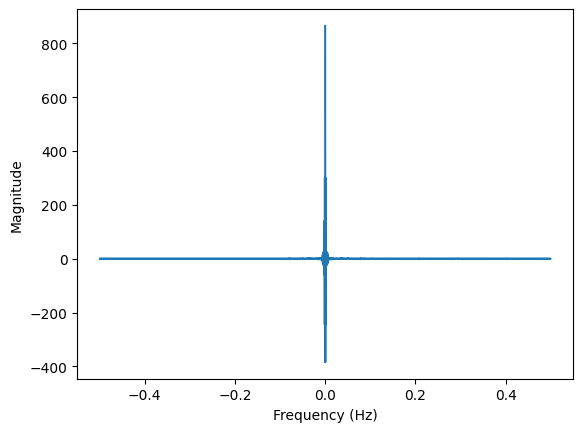

In [39]:
# Fit a Fourier series to the data
fourier_series = np.fft.fft(data)

quasi_time = np.linspace(-10,10,10000)

# Calculate the frequency components of the spectrum
frequencies = np.fft.fftfreq(len(time))

# Plot the actual spectrum of the signal
import matplotlib.pyplot as plt
plt.plot(frequencies, fourier_series)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

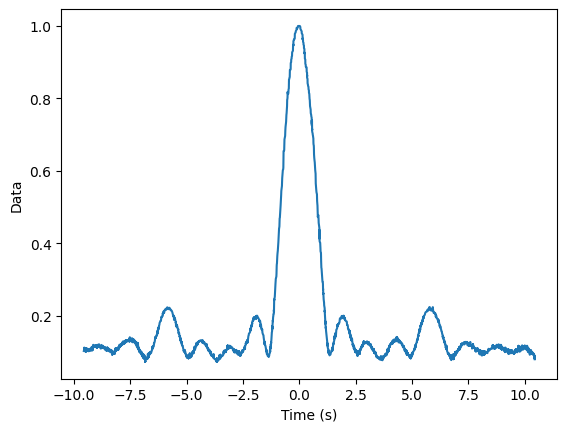

In [40]:
# Get the Fourier coefficients
fourier_coefficients = fourier_series

# Reconstruct the signal from the Fourier coefficients
reconstructed_signal = np.fft.ifft(fourier_coefficients)

# Plot the reconstructed signal
plt.plot(time, reconstructed_signal)
plt.xlabel('Time (s)')
plt.ylabel('Data')
plt.show()

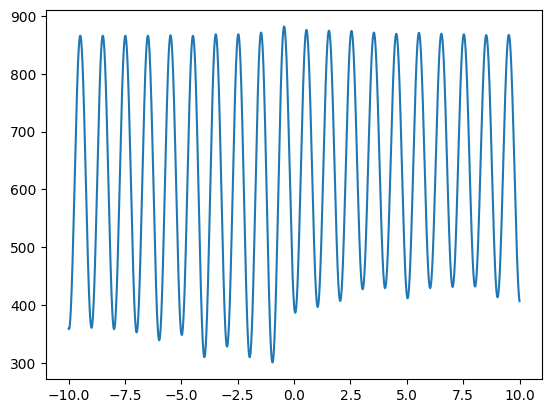

In [41]:
def evaluate_fourier_series(fourier_coefficients, x):
    # Compute the number of coefficients
    N = len(fourier_coefficients)
    
    # Initialize the signal value
    signal_value = 0
    
    # Evaluate the Fourier series at the given x value
    for n in range(N):
        signal_value += fourier_coefficients[n] * np.exp(1j * 2 * np.pi * n * x / N)
    
    return signal_value

arr = []

for i in range(len(quasi_time)):
    arr.append(evaluate_fourier_series(fourier_series, quasi_time[i]))

plt.plot(quasi_time, arr)
plt.show()

